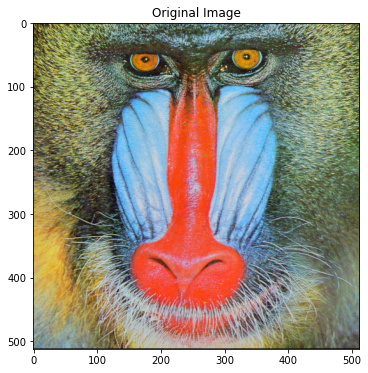

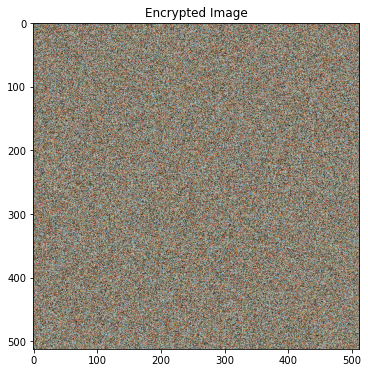

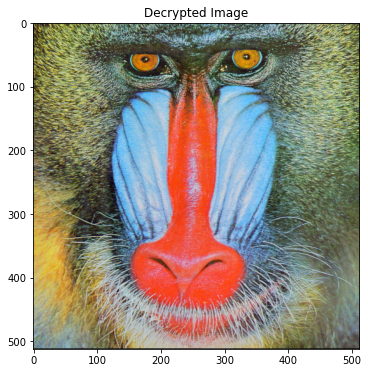

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image
image_path = r"C:\Users\Asus\phase 2 project\images\baboon.png"
original_image = cv2.imread(image_path)

# Flatten the original image to a 1D array for each channel
original_image_1d = original_image.reshape((-1, 3))

# Calculate the number of pixels
num_pixels = len(original_image_1d)

# Define the Tinkerbell map equations
def tinkerbell_map(x, y, a, b, c, d):
    x_new = x**2 - y**2 + a * x + b * y
    y_new = 2 * x * y + c * x + d * y
    return x_new, y_new

# Encryption and Decryption Process
def encrypt_decrypt_image(original_image_1d, num_pixels):
    # Generate chaotic sequences for each channel using the Tinkerbell map
    a = 0.9
    b = -0.6013
    c = 2.0
    d = 0.5
    chaotic_sequence_x = np.zeros(num_pixels)
    chaotic_sequence_y = np.zeros(num_pixels)
    x, y = 0.1, 0.1  # Initial conditions
    
    # Store original order for decryption
    original_order = np.arange(num_pixels)
    
    # Generate the chaotic sequences and store them
    for i in range(num_pixels):
        x, y = tinkerbell_map(x, y, a, b, c, d)
        chaotic_sequence_x[i] = x
        chaotic_sequence_y[i] = y
    
    # Sort the chaotic sequences to get permutation indices
    sorted_indices_x = np.argsort(chaotic_sequence_x)
    sorted_indices_y = np.argsort(chaotic_sequence_y)
    
    # Rearrange the pixels of the image based on the sorted order of the sequences for encryption
    encrypted_image_1d = original_image_1d[sorted_indices_x]
    encrypted_image_1d = encrypted_image_1d[sorted_indices_y]
    
    # Rearrange the pixels of the encrypted image based on the original order for decryption
    decrypted_image_1d = encrypted_image_1d[original_order[sorted_indices_y].argsort()]
    decrypted_image_1d = decrypted_image_1d[original_order[sorted_indices_x].argsort()]
    
    return encrypted_image_1d, decrypted_image_1d

# Encrypt and decrypt the image
encrypted_image_1d, decrypted_image_1d = encrypt_decrypt_image(original_image_1d, num_pixels)

# Reshape the encrypted and decrypted 1D arrays back to the original image shape
encrypted_image = encrypted_image_1d.reshape(original_image.shape)
decrypted_image = decrypted_image_1d.reshape(original_image.shape)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Display the encrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(encrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Encrypted Image')
plt.show()

# Display the decrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(decrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Decrypted Image')
plt.show()


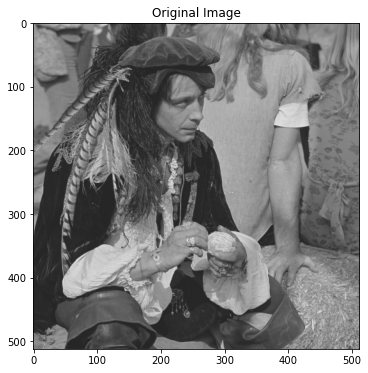

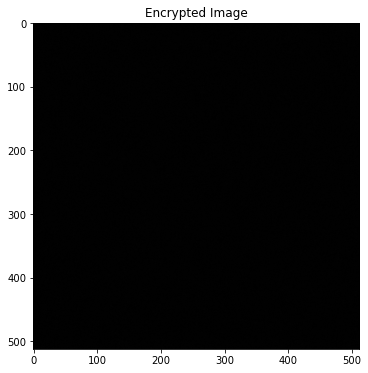

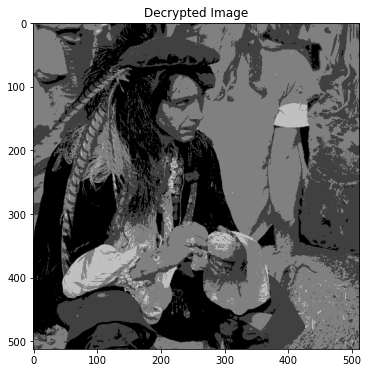

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def tinkerbell_map(x, y, a, b, c, d):
    x_new = x**2 - y**2 + a * x + b * y
    y_new = 2 * x * y + c * x + d * y
    return x_new, y_new

def encrypt_decrypt_image(original_image_1d, num_pixels):
    # Generate chaotic sequences for each channel using the Tinkerbell map
    a = 0.9
    b = -0.6013
    c = 2.0
    d = 0.5
    chaotic_sequence_x = np.zeros(num_pixels)
    chaotic_sequence_y = np.zeros(num_pixels)
    x, y = 0.1, 0.1  # Initial conditions

    # Store original order for decryption
    original_order = np.arange(num_pixels)

    # Generate the chaotic sequences and store them
    for i in range(num_pixels):
        x, y = tinkerbell_map(x, y, a, b, c, d)
        chaotic_sequence_x[i] = x
        chaotic_sequence_y[i] = y

    # Sort the chaotic sequences to get permutation indices
    sorted_indices_x = np.argsort(chaotic_sequence_x)
    sorted_indices_y = np.argsort(chaotic_sequence_y)

    # Rearrange the pixels of the image based on the sorted order of the sequences for encryption
    encrypted_image_1d = original_image_1d[sorted_indices_x]
    encrypted_image_1d = encrypted_image_1d[sorted_indices_y]

    # Bit shifting for encryption
    shift_amount = np.random.randint(1, 8)  # Generate random shift amount (1-7 bits)
    encrypted_image_1d = np.right_shift(encrypted_image_1d, shift_amount)

    # Decryption process
    # Rearrange the pixels of the encrypted image based on the original order for decryption
    decrypted_image_1d = encrypted_image_1d[original_order[sorted_indices_y].argsort()]
    decrypted_image_1d = decrypted_image_1d[original_order[sorted_indices_x].argsort()]

    # Bit shifting for decryption
    decrypted_image_1d = np.left_shift(decrypted_image_1d, shift_amount)

    return encrypted_image_1d, decrypted_image_1d

# Load an image
image_path = r"C:\Users\Asus\python image encryption\images\pirate.tif"
original_image = cv2.imread(image_path)

# Flatten the original image to a 1D array for each channel
original_image_1d = original_image.reshape((-1, 3))

# Calculate the number of pixels
num_pixels = len(original_image_1d)

# Encrypt and decrypt the image
encrypted_image_1d, decrypted_image_1d = encrypt_decrypt_image(original_image_1d, num_pixels)

# Reshape the encrypted and decrypted 1D arrays back to the original image shape
encrypted_image = encrypted_image_1d.reshape(original_image.shape)
decrypted_image = decrypted_image_1d.reshape(original_image.shape)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Display the encrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(encrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Encrypted Image')
plt.show()

# Display the decrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(decrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Decrypted Image')
plt.show()


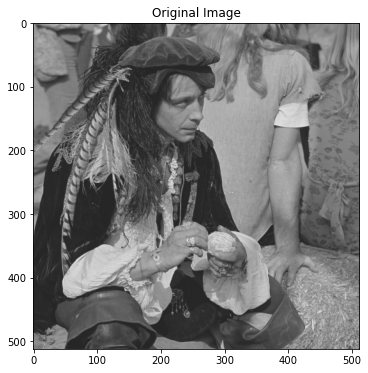

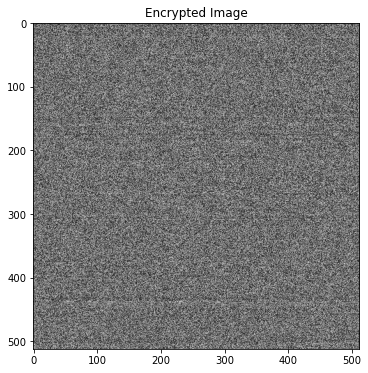

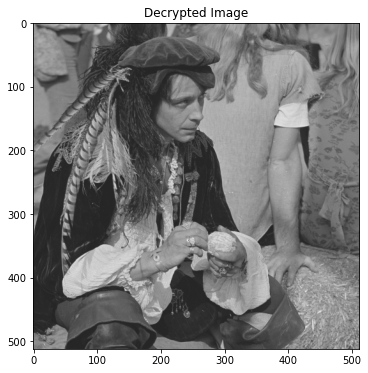

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def henon_map(x, y, a, b):
    x_new = 1 - a * x**2 + b * y
    y_new = a * x * y + b * y 

    return x_new, y_new

def encrypt_decrypt_image(original_image_1d, num_pixels):
    # Generate chaotic sequences for each channel using the Henon map
    a = 1.4
    b = 0.3  # Parameter 'b' used consistently
    chaotic_sequence_x = np.zeros(num_pixels)
    chaotic_sequence_y = np.zeros(num_pixels)
    x, y = 0.1, 0.1  # Initial conditions

    # Store original order for decryption
    original_order = np.arange(num_pixels)

    # Generate the chaotic sequences and store them
    for i in range(num_pixels):
        x, y = henon_map(x, y, a, b)
        chaotic_sequence_x[i] = x
        chaotic_sequence_y[i] = y

    # Sort the chaotic sequences to get permutation indices
    sorted_indices_x = np.argsort(chaotic_sequence_x)
    sorted_indices_y = np.argsort(chaotic_sequence_y)

    # Rearrange the pixels of the image based on the sorted order of the sequences for encryption
    encrypted_image_1d = original_image_1d[sorted_indices_x]
    encrypted_image_1d = encrypted_image_1d[sorted_indices_y]

    # Decryption process
    # Rearrange the pixels of the encrypted image based on the original order for decryption
    decrypted_image_1d = encrypted_image_1d[original_order[sorted_indices_y].argsort()]
    decrypted_image_1d = decrypted_image_1d[original_order[sorted_indices_x].argsort()]

    return encrypted_image_1d, decrypted_image_1d

# Load an image
image_path = r"C:\Users\Asus\python image encryption\images\pirate.tif"
original_image = cv2.imread(image_path)

# Flatten the original image to a 1D array for each channel
original_image_1d = original_image.reshape((-1, 3))

# Calculate the number of pixels
num_pixels = len(original_image_1d)

# Encrypt and decrypt the image
encrypted_image_1d, decrypted_image_1d = encrypt_decrypt_image(original_image_1d, num_pixels)

# Reshape the encrypted and decrypted 1D arrays back to the original image shape
encrypted_image = encrypted_image_1d.reshape(original_image.shape)
decrypted_image = decrypted_image_1d.reshape(original_image.shape)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Display the encrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(encrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Encrypted Image')
plt.show()

# Display the decrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(decrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Decrypted Image')
plt.show()


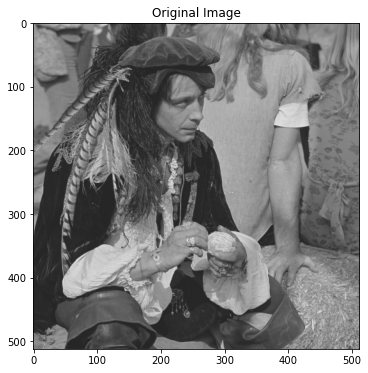

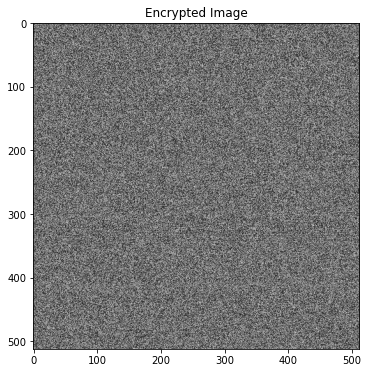

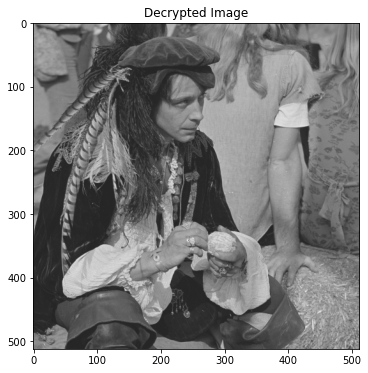

In [1]:
#modified henon map
import numpy as np
import cv2
import matplotlib.pyplot as plt

def modified_henon_map(x, y, a, b, c):
    x_new = 1 - a * x**2 + b * y * np.sin(c * x)  # Modified Henon map
    y_new = a * x * y + b * y
    return x_new, y_new

def encrypt_decrypt_image(original_image_1d, num_pixels):
    # Generate chaotic sequences for each channel using the modified Henon map
    a = 1.4
    b = 0.3
    c = 0.5  # New parameter for sine term
    chaotic_sequence_x = np.zeros(num_pixels)
    chaotic_sequence_y = np.zeros(num_pixels)
    x, y = 0.1, 0.1  # Initial conditions

    # Store original order for decryption
    original_order = np.arange(num_pixels)

    # Generate the chaotic sequences and store them
    for i in range(num_pixels):
        x, y = modified_henon_map(x, y, a, b, c)
        chaotic_sequence_x[i] = x
        chaotic_sequence_y[i] = y

    # Sort the chaotic sequences to get permutation indices
    sorted_indices_x = np.argsort(chaotic_sequence_x)
    sorted_indices_y = np.argsort(chaotic_sequence_y)

    # Rearrange the pixels of the image based on the sorted order of the sequences for encryption
    encrypted_image_1d = original_image_1d[sorted_indices_x]
    encrypted_image_1d = encrypted_image_1d[sorted_indices_y]

    # Decryption process
    # Rearrange the pixels of the encrypted image based on the original order for decryption
    decrypted_image_1d = encrypted_image_1d[original_order[sorted_indices_y].argsort()]
    decrypted_image_1d = decrypted_image_1d[original_order[sorted_indices_x].argsort()]

    return encrypted_image_1d, decrypted_image_1d

# Load an image
image_path = r"C:\Users\Asus\python image encryption\images\pirate.tif"
original_image = cv2.imread(image_path)

# Flatten the original image to a 1D array for each channel
original_image_1d = original_image.reshape((-1, 3))

# Calculate the number of pixels
num_pixels = len(original_image_1d)

# Encrypt and decrypt the image
encrypted_image_1d, decrypted_image_1d = encrypt_decrypt_image(original_image_1d, num_pixels)

# Reshape the encrypted and decrypted 1D arrays back to the original image shape
encrypted_image = encrypted_image_1d.reshape(original_image.shape)
decrypted_image = decrypted_image_1d.reshape(original_image.shape)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Display the encrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(encrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Encrypted Image')
plt.show()

# Display the decrypted image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(decrypted_image.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title('Decrypted Image')
plt.show()
